In [1]:
!pip install mplsoccer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.5/88.5 kB 3.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch

In [27]:
df = pd.read_csv("erling_haaland_2022_understat.csv")

In [4]:
#scaling
df['X'] = df['X'] * 100
df['Y'] = df['Y'] * 100

In [5]:
df.head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,479846,20,MissedShots,93.599998,50.299999,0.484085,Erling Haaland,a,8260,OpenPlay,2022,Head,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Phil Foden,Cross
1,479847,35,Goal,88.500000,50.000000,0.761169,Erling Haaland,a,8260,Penalty,2022,LeftFoot,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,NaN,Standard
2,479854,64,Goal,86.400002,40.500000,0.328053,Erling Haaland,a,8260,OpenPlay,2022,LeftFoot,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Kevin De Bruyne,Throughball
3,479855,69,MissedShots,95.300003,55.200001,0.526608,Erling Haaland,a,8260,OpenPlay,2022,Head,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Jack Grealish,Chipped
4,479856,75,BlockedShot,89.400002,71.000000,0.066443,Erling Haaland,a,8260,OpenPlay,2022,LeftFoot,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Ilkay Gündogan,Pass


In [6]:
total_shots = df.shape[0]
total_goals = df[df["result"] == "goal"].shape[0]
total_xg = df["xG"].sum()
xg_per_shot = total_xg / total_shots
points_average_distance = df['X'].mean()
actual_average_distance = 120 - (df['X'] * 1.2).mean()

In [12]:
background_color="#1F2123"

In [7]:
import matplotlib.font_manager as font_manager
font_props = font_manager.FontProperties(fname="Arvo-Regular.ttf")

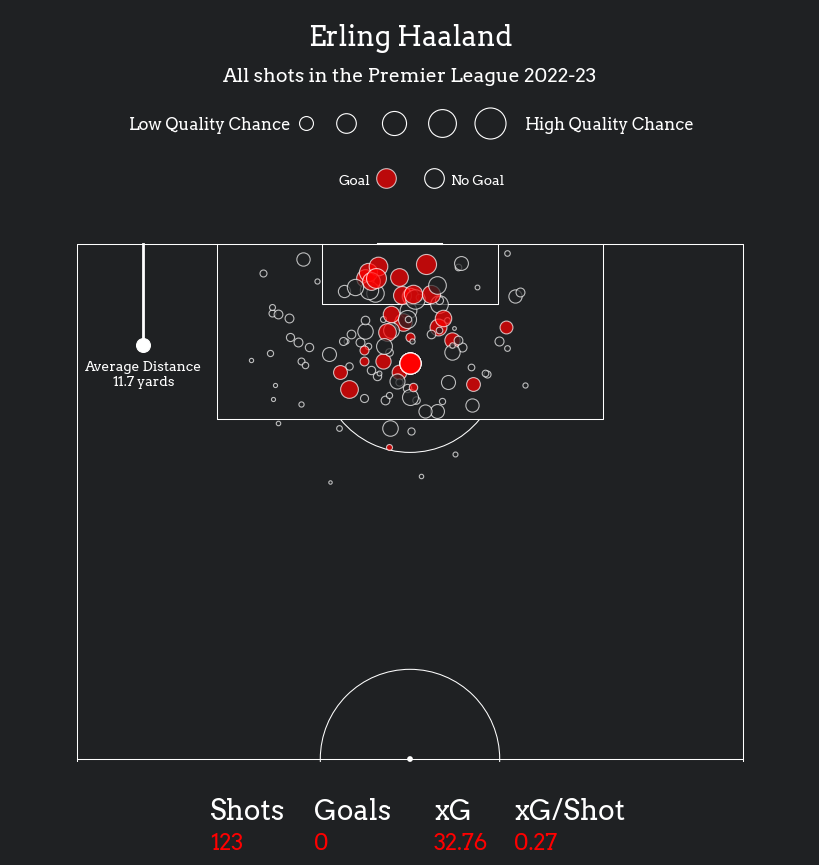

In [26]:
fig = plt.figure(figsize=(8,12))
fig.patch.set_facecolor(background_color)

ax1 = fig.add_axes([0, 0.7, 1, .2])
ax1.set_facecolor(background_color)
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)

ax1.text(
    x=0.5,
    y=.85,
    s='Erling Haaland',
    fontsize=20,
    fontproperties=font_props,
    fontweight='bold',
    color='white',
    ha='center'
)

ax1.text(
    x=0.5,
    y=.7,
    s=f'All shots in the Premier League 2022-23',
    fontsize=14,
    fontweight='bold',
    fontproperties=font_props,
    color='white',
    ha='center'
)
ax1.text(
    x=0.25,
    y=0.5,
    s=f'Low Quality Chance',
    fontsize=12,
    fontproperties=font_props,
    color='white',
    ha='center'
)

# add a scatter point between the two texts (BALLS)
ax1.scatter(
    x=0.37,
    y=0.53,
    s=100,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)
ax1.scatter(
    x=0.42,
    y=0.53,
    s=200,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)
ax1.scatter(
    x=0.48,
    y=0.53,
    s=300,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)
ax1.scatter(
    x=0.54,
    y=0.53,
    s=400,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)
ax1.scatter(
    x=0.6,
    y=0.53,
    s=500,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)

ax1.text(
    x=0.75,
    y=0.5,
    s=f'High Quality Chance',
    fontsize=12,
    fontproperties=font_props,
    color='white',
    ha='center'
)

#Goal or no goal
ax1.text(
    x=0.45,
    y=0.27,
    s=f'Goal',
    fontsize=10,
    fontproperties=font_props,
    color='white',
    ha='right'
)
ax1.scatter(
    x=0.47,
    y=0.3,
    s=200,
    color='red',
    edgecolor='white',
    linewidth=.8,
    alpha=.7
)


ax1.scatter(
    x=0.53,
    y=0.3,
    s=200,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)

ax1.text(
    x=0.55,
    y=0.27,
    s=f'No Goal',
    fontsize=10,
    fontproperties=font_props,
    color='white',
    ha='left'
)

ax1.set_axis_off()

#second section of the graphic
ax2 = fig.add_axes([.05, .25, .9, .5])
ax2.set_facecolor(background_color)

#our pitch

pitch = VerticalPitch(
    pitch_type='opta',
    half=True,
    pitch_color=background_color,
    pad_bottom=.5,
    line_color='white',
    linewidth=.75,
    axis=True, label=True
)

pitch.draw(ax=ax2)

#average shot distance
ax2.scatter(
    x=90,
    y=points_average_distance,
    s=100,
    color='white',
    linewidth=.8
)
# create a line from the bottom of the pitch to the scatter point
ax2.plot(
    [90, 90],
    [100, points_average_distance],
    color='white',
    linewidth=2
)

# Add a text label for the average distance
ax2.text(
    x=90,
    y=points_average_distance - 4,
    s=f'Average Distance\n{actual_average_distance:.1f} yards',
    fontsize=10,
    fontproperties=font_props,
    color='white',
    ha='center'
)

for x in df.to_dict(orient='records'):
    pitch.scatter(
        x['X'],
        x['Y'],
        s=300 * x['xG'],
        color='red' if x['result'] == 'Goal' else background_color,
        ax=ax2,
        alpha=.7,
        linewidth=.8,
        edgecolor='white'
    )

ax2.set_axis_off()

#third section
ax3 = fig.add_axes([0, .2, 1, .05])
ax3.set_facecolor(background_color)

ax3.text(
    x=0.25,
    y=.5,
    s='Shots',
    fontsize=20,
    fontproperties=font_props,
    fontweight='bold',
    color='white',
    ha='left'
)

ax3.text(
    x=0.25,
    y=0,
    s=f'{total_shots}',
    fontsize=16,
    fontproperties=font_props,
    color='red',
    ha='left'
)

ax3.text(
    x=0.38,
    y=.5,
    s='Goals',
    fontsize=20,
    fontproperties=font_props,
    fontweight='bold',
    color='white',
    ha='left'
)

ax3.text(
    x=0.38,
    y=0,
    s=f'{total_goals}',
    fontsize=16,
    fontproperties=font_props,
    color='red',
    ha='left'
)

ax3.text(
    x=0.53,
    y=.5,
    s='xG',
    fontsize=20,
    fontproperties=font_props,
    fontweight='bold',
    color='white',
    ha='left'
)

ax3.text(
    x=0.53,
    y=0,
    s=f'{total_xg:.2f}',
    fontsize=16,
    fontproperties=font_props,
    color='red',
    ha='left'
)

ax3.text(
    x=0.63,
    y=.5,
    s='xG/Shot',
    fontsize=20,
    fontproperties=font_props,
    fontweight='bold',
    color='white',
    ha='left'
)

ax3.text(
    x=0.63,
    y=0,
    s=f'{xg_per_shot:.2f}',
    fontsize=16,
    fontproperties=font_props,
    color='red',
    ha='left'
)

ax3.set_axis_off()